## Calculation of RMS value and plotting 
- This notebook reads the file with the raw signals and calculates the RMS values.
- Then it produces a plot with all eight sensors data .


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

file_name='wave_out_2'
file_name_csv = file_name + '.csv'

# Read the CSV file
df = pd.read_csv(file_name_csv)

# Extract the sensor columns
sensor_columns = df.columns
for i in range(0, len(sensor_columns)):
    df.rename(columns = {sensor_columns[i]:i}, inplace = True)

#print(df.columns)

In [105]:
def rmsValue(array):
    n = len(array)
    squre = 0.0
    root = 0.0
    mean = 0.0
    
    #calculating Squre
    for i in range(0, n):
        squre += (array[i] ** 2)
    #Calculating Mean
    mean = (squre/ (float)(n))
    #Calculating Root
    root = math.sqrt(mean)
    return root

In [106]:
rms_row_count = (int(len(df) / 20) - 1)

In [107]:
rms_initial_values =  np.arange(start=0,stop= rms_row_count*8).reshape(rms_row_count,8)
rms_initial_values[rms_initial_values > 0] = 0

In [108]:
indexes = np.arange(start=0,stop= rms_row_count)

In [109]:
df_result = pd.DataFrame(rms_initial_values, indexes, [1,2,3,4,5,6,7,8])
print(df_result)

     1  2  3  4  5  6  7  8
0    0  0  0  0  0  0  0  0
1    0  0  0  0  0  0  0  0
2    0  0  0  0  0  0  0  0
3    0  0  0  0  0  0  0  0
4    0  0  0  0  0  0  0  0
..  .. .. .. .. .. .. .. ..
276  0  0  0  0  0  0  0  0
277  0  0  0  0  0  0  0  0
278  0  0  0  0  0  0  0  0
279  0  0  0  0  0  0  0  0
280  0  0  0  0  0  0  0  0

[281 rows x 8 columns]


In [110]:
for i in range(8):
    df_sensor = df[i]
    temp_row = []
    for j in range(int(len(df) / 20) - 1):
        temp_df = df_sensor[(j*20): (j+1)*20]
        temp_df=temp_df.reset_index(drop=True)
        temp_df = pd.DataFrame([rmsValue(temp_df)])
        df_result[i+1].iloc[j] = rmsValue(temp_df)
    

C:\Users\Dide\AppData\Local\Temp\ipykernel_10336\1067996421.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[i+1].iloc[j] = rmsValue(temp_df)


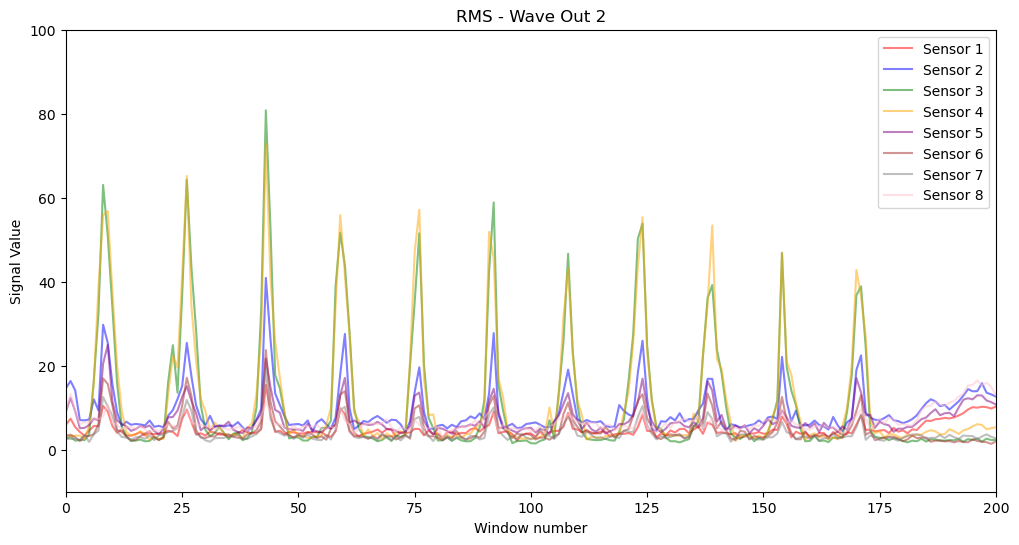

In [112]:

time_values = np.arange(rms_row_count)  

# Define legend names and colors
legend_names = ['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'pink']

# Set the plot size
plt.figure(figsize=(12, 6))  # Adjust figsize as needed

# Plot each sensor with custom legend names and colors
for i in range (8):
     plt.plot(time_values, df_result[i+1], label=legend_names[i], color=colors[i], alpha=0.5)


# Plot RMS values for each sensor
#plt.plot(time_values, df_rms.repeat(len(time_values)), color='black', label='RMS')
#plt.plot(time_values[:len(df_result)], df_result, color='blue', label='RMS')

# Set plot labels and title
plt.xlabel('Window number')
plt.ylabel('Signal Value')
plt.title('RMS - Wave Out 2')

# Set y-axis limits based on the minimum and maximum values of the dataset
y_min = df.min().min()  # Minimum value across all columns
y_max = df.max().max()  # Maximum value across all columns
plt.ylim(-10, 100)
plt.xlim(0,200)

# Add legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
git